# Malayalam Language Model from Scratch using fastai x blurr x huggingface

References: 

[DeBLURRTa - A baseline using fast.ai and blurr](https://www.kaggle.com/code/ohmeow/deblurrta-a-baseline-using-fast-ai-and-blurr/notebook)

[ AI4Bharat /
indicTrans ](https://github.com/AI4Bharat/indicTrans)


[inltk](https://github.com/goru001/inltk)

# Installations

In [1]:
!pip install -Uqq huggingface_hub["fastai"] ohmeow-blurr datasets

     |████████████████████████████████| 101 kB 8.8 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 362 kB 32.6 MB/s 
     |████████████████████████████████| 4.4 MB 7.7 MB/s 
     |████████████████████████████████| 96 kB 4.0 MB/s 
     |████████████████████████████████| 1.2 MB 41.7 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 6.6 MB 57.6 MB/s 
     |████████████████████████████████| 596 kB 60.1 MB/s 
     |████████████████████████████████| 212 kB 44.6 MB/s 
     |████████████████████████████████| 140 kB 73.9 MB/s 
     |████████████████████████████████| 1.1 MB 51.3 MB/s 
     |████████████████████████████████| 127 kB 75.7 MB/s 
     |████████████████████████████████| 271 kB 33.3 MB/s 
     |████████████████████████████████| 144 kB 67.5 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the pack

In [2]:
import pandas as pd
from datasets import load_dataset

from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

# Dataset Prep

In [3]:
oscar_ml_dataset = load_dataset('oscar', "unshuffled_deduplicated_ml", split='train', streaming=False)

Generating train split:   0%|          | 0/453904 [00:00<?, ? examples/s]

Dataset oscar downloaded and prepared to /root/.cache/huggingface/datasets/oscar/unshuffled_deduplicated_ml/1.0.0/84838bd49d2295f62008383b05620571535451d84545037bb94d6f3501651df2. Subsequent calls will reuse this data.


In [4]:
oscar_ml_dataset = oscar_ml_dataset.train_test_split(test_size=0.1)
oscar_ml_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text'],
        num_rows: 408513
    })
    test: Dataset({
        features: ['id', 'text'],
        num_rows: 45391
    })
})

In [5]:
train_df = oscar_ml_dataset['train'].to_pandas()
valid_df =  oscar_ml_dataset['test'].to_pandas()

In [6]:
train_df.rename(columns={'id':0, 'text':1},
          inplace=True)
valid_df.rename(columns={'id':0, 'text':1},
          inplace=True)

In [7]:
train_df = train_df.iloc[0:1500] #slice (train org.len = 408513, valid or.len=45391)
train_df.sample(frac=1) #Shuffle
valid_df = valid_df.iloc[0:500]
valid_df.sample(frac=1)

,0,1
238,253568,"""https://ml.wikipedia.org/w/index.php?title=സോങ്_രാജവംശം&oldid=2648068"" എന്ന താളിൽനിന്നു ശേഖരിച്ചത്"
168,301030,"അവസാനം എപ്പോഴാണ് നിങ്ങൾ നൃത്തം ചെയ്തത്? കല്യാണത്തിലോ ഒരു നൈറ്റ്ക്ലബിലോ ജന്മദിനാഘോഷമോ ഒരു മത്സരത്തിലോ അല്ല, അത്രതന്നെ. ഇത് അന്തസ്സുള്ള ഒരു അവസ്ഥയിലല്ല. അത്തരം നൃത്തത്തിനു വേണ്ടി ആവേശത്തിന്റെ അല്ലെങ്കിൽ ആവേശത്തിന്റെ അവസ്ഥ ആവശ്യമാണ്, ഒരു കാരണം ആവശ്യമാണ്. എന്തുകൊണ്ടാണ് ചില കൃത്രിമ വർദ്ധിപ്പിക്കലുകൾ നിങ്ങളെ ഒന്ന് തയാറാക്കാൻ ആക്കാൻ ആവശ്യപ്പെടുന്നത്, അതിനാൽ ശരീരത്തിൽ അല്പം നിയന്ത്രണം നഷ്ടപ്പെടുകയും വേനൽക്കാലത്ത് നൃത്തം തുടങ്ങുകയും ചെയ്യും.\nഎന്നാൽ ഒരാൾക്ക് മാത്രമേ സുബോധത്തോടെ നൃത്തം ചെയ്യാൻ കഴിയൂ. നിങ്ങൾ കേവലം സംഗീതത്തെ മാത്രം ആശ്രയിക്കേണ്ടിവരും, നൃത്തം ചെയ്യാൻ തുടങ്ങുമ്പോൾ. ഒരുപക്ഷേ സംഗീതം ഇല്ലാ..."
498,195710,കൊച്ചി: കൊച്ചി മെട്രോ പദ്ധതിയുടെ രണ്ടാം ഘട്ടത്തില്‍ താനും ഡി.എം.ആര്‍.സിയും പങ്കാളികളാകില്ലെന്ന് മുഖ്യഉപദേശകന്‍ ഇ.ശ്രീധരന്‍. രണ്ടാം ഘട്ടം തനിച്ച് ചെയ്യുന്നതിന് കെ.എം.ആര്‍.എല്‍ പ്രാപ്തരാണെന്നും അദ്ദേഹം പറഞ്ഞു. ഉദ്ഘാടനത്തിന് മുന്നോടിയായി മെട്രോ സ്‌റ്റേഷനുകള്‍ സന്ദര്‍ശിച്ച ശേഷം മാധ്യമ പ്രവര്‍ത്തകരോട് സംസാരിക്കുകയായിരുന്നു അദ്ദേഹം.\nമെട്രോ ഉദ്ഘാടന ചടങ്ങില്‍ നിന്ന് തന്നെ ഒഴിവാക്കിയതില്‍ പരാതിയില്ല. പ്രധാനമന്ത്രിയുടെ സുരക്ഷയാണ് പ്രധാനം. സുരക്ഷാ ഏജന്‍സി എന്താണ് പറയുന്നത് അതുപോലെ ചെയ്യണം. സംഭവം വിവാദമാക്കേണ്ട കാര്യമില്ല. ക്ഷണിച്ചാല്‍ വേദിയിലുണ്ടാകും.\nകൊച്ചി മെട്രോ പദ്ധതി പ്രത്യേകിച്ച് വെല്ലുവി...
23,92662,1942 ഫെബ്രുവരി 26 -ന് റീൻഹാഡ് ഹെയ്‌ഡ്രിക് മാർട്ടിൻ ലൂതറിന് അന്തിമപരിഹാരത്തിനു വേണ്ട ഭരണസഹായം വേണമെന്ന് ആവശ്യപ്പെട്ട് എഴുതിയ തുടർകത്ത്.
367,177739,"കൊച്ചി: ദേശീയതലത്തില്‍ തന്നെ ചര്‍ച്ചയായ ജിഷ വധക്കേസിന്റെ വിധിക്ക് ഇന്ന് കേരളം ആകാംക്ഷയോടെയാണ് കാത്തിരിക്കുന്നത്. നാടകീയതകള്‍ നിറഞ്ഞുനിന്നതായിരുന്നു ജിഷ വധക്കേസ്. അതിനാല്‍, കേസിന്റെ വിധിയില്‍ ആന്റിക്ലൈമാക്‌സുണ്ടാകുമോ എന്നാണ് ഏവരും ഉറ്റുനോക്കുന്നത്. സംസ്ഥാന രാഷ്ട്രീയത്തെ തന്നെ പിടിച്ചുകുലുക്കിയ കേസായതിനാല്‍ പോലീസും, പ്രോസിക്യൂഷനും കരുതലോടെയാണ് മുന്നോട്ട് നീങ്ങിയത്.\nസംസ്ഥാനത്തെ ഞെട്ടിച്ചുകൊണ്ട് 2016 ഏപ്രില്‍ 28 നാണ് പെരുമ്പാവൂരില്‍ ദളിത് വിദ്യാര്‍ഥിനിയായ ജിഷ കൊല്ലപ്പെട്ടത്. ഡല്‍ഹി നിര്‍ഭയ കൊലപാതകത്തിനോട് സാദൃശ്യമുണ്ടായിരുന്നു ജിഷയുടെ കൊലപാതകത്തിന്. കൊലപാതകത്തിന്റെ ക്രൂരത വ്യക്തമാക്കുന്ന പോസ..."
...,...,...
38,183709,"ന്യൂഡൽഹി: ഡൽഹി സർവകലാശാല വിദ്യാർത്ഥി യൂണിയൻ തിരഞ്ഞെടുപ്പിൽ എ.ബി.വി.പിക്ക് ജയം. 44.46 ശതമാനം പോളിംഗ് രേഖപ്പെടുത്തിയ തിരഞ്ഞെടുപ്പിലാണ്എ.ബി.വി.പി യൂണിയൻ പിടിച്ചെടുത്തത്. പ്രസിഡന്റ് സ്ഥാനത്തേക്ക് അങ്കിവ് ബസോയ, വൈസ് പ്രസിഡന്റായി ശക്തി സിംഗ്,ജോയിന്റ് സെക്രട്ടറിയായി ജ്യോതി ചൗധരി തുടങ്ങിയവർ തിരഞ്ഞെടുത്തപ്പോൾ സെക്രട്ടറിയായി എൻ.എസ്.യു.ഐ സ്ഥാനാർത്ഥി ആകാശ് ചൗധരി തിരഞ്ഞെടുക്കപ്പെട്ടു.\n52 കേന്ദ്രങ്ങളിൽ നടന്ന തിരഞ്ഞെടുപ്പ് കനത്ത പൊലീസ് സുരക്ഷയിലാണ് നടന്നത്. 23 സ്ഥാനാർത്ഥികളാണ് മത്സരത്തിനുണ്ടായിരുന്നത്.\nഒരു കൈയബദ്ധം, മറ്റൊന്നും ഉദ്ദേശിച്ചിട്ടില്ല: യുവതിക്കയച്ച വാട്‌സാപ്പ് ചാറ്റിന് മാപ്പ് പറഞ്ഞ് ചേതൻ ..."
158,221910,"മലയാറ്റൂര്‍ തീര്‍ഥാടകര്‍ക്കിടയിലേക്കു ലോറി പാഞ്ഞുകയറി ഒരാള്‍ മരിച്ചു; മൂന്നുപേര്‍ക്കു പരുക്ക്,accident at kodakara malayattoor pilgrim diedkeralaonlinenews.com | Malayalam news, kerala news, onlinenews,\nതൃശൂര്‍: കൊടകരയില്‍ മലയാറ്റൂര്‍ തീര്‍ഥാടകര്‍ക്ക് നേരെ ടിപ്പര്‍ ലോറി പാഞ്ഞുകയറി ഒരാള്‍ മരിച്ചു. തൃശൂര്‍ പാവറട്ടി സ്വദേശി അക്ഷയ് ആണ് മരിച്ചത്. മൂന്ന് പേര്‍ക്ക് പരിക്കേറ്റു. ചിറ്റാട്ടുകര സ്വദേശി ഗബ്രിയേല്‍, എരുമപ്പെട്ടി സ്വദേശികളായ ഷാലിന്‍, ജോണി എന്നിവരാണ് പരുക്കേറ്റ് ചികിത്സയിലുള്ളത്.\nപരിക്കേറ്റവരെ ചാലക്കുടിയിലെ സ്വകാര്യ ആശുപത്രിയില്‍ പ്രവേശിപ്പിച്ചു. ഇതില്‍ ഒരാളുടെ നില ഗുരുതരമാണ്. ഇന്നു പു..."
343,273993,"ആക്ഷൻ ഹീറോ ബിജു എന്ന ചിത്രം കൊണ്ട് പ്രേക്ഷകരുടെ മനസിൽ കയറികൂടിയ താരമാണ് അരിസ്റ്റോ സുരേഷ്. നിഷ്കളങ്കമായ അഭിനയമാണ് അദ്ദേഹത്തിനെ പ്രേക്ഷക ഹൃദങ്ങളിലേയ്ക്ക് കൂടുതൽ അടുപ്പിച്ചത്. എന്നാൽ സിനിമയിൽ മാത്രമല്ല യഥാർഥ ജീവിതത്തിലും അദ്ദേഹം അങ്ങനെ തന്നെയാണ്.\nബിഗ് ബോസ് റിയാലിറ്രി ഷോയിലെ ഒരു മത്സാരാഥിയാണ് അരിസ്റ്റോ സുരോഷ്. അദ്ദേഹത്തിന്റെ ഷോയ്ക്കുള്ളിലെ പെരുമാറ്റവും അങ്ങനെ തന്നെയാണ്. നിഷ്കളങ്കമായ പല സംശയങ്ങളായിരിക്കും അദ്ദേഹം പ്രകടപ്പിക്കുന്നത്. തന്റെ സംശയങ്ങളും തനിയ്ക്ക് അറിയാൻ പാടില്ലാത്ത് കാര്യങ്ങളും മറ്റുള്ളവരോട് ചോദിച്ച് മനസിലാക്കുന്നതിന് ഒരു ഉപേക്ഷയും കാണിക്കാറില്ല.\nമിസ് ഇന്ത്യ, മിസ് വേൾഡാ..."
10,26018,» അയ്യപ്പനും ഒരുപാട് പേരെ കൊന്നിട്ടുള്ളത

In [8]:
print(len(train_df), len(valid_df))
train_df.head()

1500 500


,0,1
0,215423,"കരിയറിലാദ്യമായി മാസ്റ്റര്‍ ബ്ലാസ്റ്റര്‍ സച്ചിന്‍ തെണ്ടുല്‍ക്കര്‍ ടെസ്റ്റ് ക്രിക്കറ്റില്‍ നേരിട്ട ആദ്യ പന്ത് സിക്‌സറിനു പറത്തുന്ന കാഴ്ചയോടെ ആസ്‌ത്രേലിയ്‌ക്കെതിരായ പരമ്പരയില്‍ ഇന്ത്യ വിജയത്തോടെ തുടങ്ങി. രണ്ടാം ഇന്നിങ്ങ്‌സില്‍ ആസ്‌ത്രേലിയ മുന്നോട്ടുവച്ച 50 റണ്‍സിന്റെ വിജയലക്ഷ്യം രണ്ടു വിക്കറ്റു നഷ്ടത്തില്‍ മറികടന്നാണ് ഇന്ത്യ വിജയഭേരി മുഴക്കിയത്. ഈ ജയത്തോടെ ഏറ്റവും കൂടുതല്‍ ടെസ്റ്റ് വിജയങ്ങള്‍ നേടിയ ഇന്ത്യന്‍ ക്യാപ്റ്റന്‍മാരുടെ പട്ടികയില്‍ സൗരവ് ഗാംഗുലിയ്‌ക്കൊപ്പം ഒന്നാം സ്ഥാനം പങ്കിടുകയാണ് മഹേന്ദ്ര സിങ് ധോണി. സ്‌കോര്‍: ആസ്‌ത്രേലിയ -380,241 ഇന്ത്യ-572,50/2\nഒന്‍പതിനു 232 എന്ന സ്‌കോറില്‍ രാവിലെ..."
1,127884,9. സിഗററ്റ് കളയാൻ പറഞ്ഞ മേലുദ്യോഗസ്ഥയുടെ പാന്റിന്റെ ബെൽറ്റിൽ പിടിച്ച് വേദനിപ്പിച്ച് പാഠം പഠിപ്പിക്കുന്ന നായകൻ\nമനുഷ്യർ ജീവിക്കുന്നത് ഇവരുടെ ഭാഷയിൽ ‘കഴപ്പ്’ കൊണ്ടു മാത്രമാണെന്ന് ഉറച്ച ബോധ്യമുണ്ടായിരുന്നു സംവിധായകനും ആർത്തിയോടെ കൈയ്യടിക്കുന്നവർക്കും ചമ്മി തകർന്നിരിക്കുന്ന സ്ത്രീകളെ അളന്നും പുച്ഛിച്ചും സഹതപിച്ചും കടന്നു പോകുന്നവർക്കും.\nഇത്രയും വലിയ മനുഷ്യ വിരുദ്ധതകളെ തിരിച്ചറിഞ്ഞാലും അതു പറഞ്ഞാൽ നമ്മൾ മാസിൽ നിന്ന് പുറത്താവൂല്ലോ അല്ലേ?.\nഅഹമ്മദാബാദ്: പശുവിന്റെ പേരിൽ നിയമം കയ്യിലെടുക്കാൻ ആരെയും അനുവദിക്കില്ലെന്ന് പ്രധാനമന്ത്രി നരേന്ദ്ര മോദി. മനുഷ്യരെ കൊന്നിട്ടല്ല പശുവിനെ സംരക്ഷിക്കേണ്ടത്. അക്ര...
2,160458,"ന്യൂഡൽഹി: യാത്രാബത്ത നൽകിയാൽ വനിതാകമ്മീഷനു മുമ്പിൽ ഹാജരാകുന്ന കാര്യം ആലോചിക്കാമെന്ന് പറഞ്ഞ പിസി ജോർജിന് മറുപടിയുമായി കമ്മീഷൻ. പണമില്ലെന്ന് എഴുതി നൽകിയാൽ യാത്രാബത്ത ദേശീയ വനിതാ കമ്മീഷൻ നൽകുമെന്ന് അധ്യക്ഷ രേഖ ശർമ്മ വ്യക്തമാക്കി. കന്യാസ്ത്രീയെ അധിക്ഷേപിച്ചയാളിൽ നിന്ന് ഇതിൽ കൂടുതലൊന്നും പ്രതീക്ഷിക്കുന്നില്ലെന്നും അവർ വ്യക്തമാക്കി.\nജലന്ധർ ബിഷപ്പിനെതിരെ പരാതി നൽകിയ കന്യാസ്ത്രീയ്ക്കെതിരെ മോശമായ പരാമർശങ്ങൾ പൂഞ്ഞാർ എം എൽ എ നടത്തിയിരുന്നു. ഇതിനെതിരെ പ്രതിഷേധവും ശക്തമായിരുന്നു. തുടർന്ന്, കന്യാസ്ത്രീയെ അധിക്ഷേപിക്കുന്ന തരത്തിലുള്ള പരാമർശം നടത്തിയതിന് ഇരുപതാം തിയതി സിറ്റിംഗിനു ഹാജരാകാൻ വനിതാകമ്മീഷൻ പി..."
3,368697,"ഇന്‍സ്റ്റാഗ്രാമിന്റെ ആന്‍ഡ്രോയിഡ് പതിപ്പിലാണ് ഹിന്ദി ഭാഷ പരീക്ഷിക്കുന്നതെന്നാണ് വിവരം. ഐഓഎസ് ഉപകരണങ്ങളില്‍ അധികം വൈകാതെ ഈ ഫീച്ചര്‍ എത്തിയേക്കും\nഇന്‍സ്റ്റഗ്രാമിന്റെ ഏറ്റവും വലിയ വിപണികളില്‍ ഒന്നാണ് ഇന്ത്യ. അമേരിക്കയ്ക്ക് ശേഷം ഏറ്റവും കൂടുതല്‍ ഉപയോക്താക്കളുള്ള രണ്ടാമത്തെ രാജ്യം. ഇപ്പോഴിതാ രാജ്യത്ത് കൂടുതല്‍ ശ്രദ്ധ ചെലുത്തുന്നതിന്റെ ഭാഗമായി ഇന്‍സ്റ്റാഗ്രാമില്‍ ഹിന്ദി ഭാഷ ഉള്‍പ്പെടുത്താനുള്ള ശ്രമങ്ങള്‍ നടക്കുകയാണ്. ജെയ്ന്‍ മഞ്ചൂം വോങ് എന്നയാളാണ് ഇതു സംബന്ധിച്ച വിവരം പുറത്തുവിടുന്നത്. ഹിന്ദി ഭാഷയിലുള്ള സെറ്റിങ്‌സ് പേജ്, നോട്ടിഫിക്കേഷന്‍സ്, കമ്മന്റുകള്‍, പ്രൊഫൈല്‍ എന്നിവയുടെ സ്‌ക്രീന്‍ ഷോട്ടു..."
4,205472,"ഭാരതത്തിലെ പ്രശസ്ത ശാസ്ത്രജ്ഞനും ബംഗാള്‍ കെമിക്കല്‍ ആന്റ് ഫാര്‍മസ്യൂട്ടിക്കലിന്റെ സ്ഥാപകനുമായ പ്രഫുല്ല ചന്ദ്ര റേയുടെ ജന്മദിനമാണ് ആഗസ്റ്റ് 2. പണ്ഡിതന്‍, രസതന്ത്രശാസ്ത്രജ്ഞന്‍, വ്യവസായ സംരംഭകന്‍ എന്നീ നിലകളിൽ അറിയപ്പെട്ട വ്യക്തിയാണ് പ്രഫുല്ല ചന്ദ്ര റായ്‌ കൂടുതല്‍ അറിയാന്‍ ഇവിടെ ക്ലിക്ക് ചെയ്യുക"


In [ ]:
train_df['is_valid']  = False
valid_df['is_valid']  = True

In [10]:
from transformers import AutoModelForCausalLM
model_cls = AutoModelForCausalLM

pretrained_model_name = "xlm-roberta-base"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name, model_cls=model_cls)

# some tokenizers like gpt and gpt2 do not have a pad token, so we add it here mainly for the purpose
# of setting the "labels" key appropriately (see below)
if hf_tokenizer.pad_token is None:
    hf_tokenizer.pad_token = "[PAD]"

hf_tokenizer.pad_token, hf_tokenizer.pad_token_id

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

('<pad>', 1)

In [ ]:
train_df['id'] = train_df['id'].astype(str)
valid_df['id'] = valid_df['id'].astype(str)

In [ ]:
train_df.info()

## Tokenizing & Data Loaders

In [11]:
preprocessor = LMPreprocessor(hf_tokenizer, chunk_size=128, text_attr=1)
proc_df = preprocessor.process_df(train_df, valid_df)

print(len(proc_df))
proc_df.head(2)

9156


,proc_1,is_valid
0,കരിയറിലാദ്യമായി മാസ്റ്റര്‍ ബ്ലാസ്റ്റര്‍ സച്ചിന്‍ തെണ്ടുല്‍ക്കര്‍ ടെസ്റ്റ് ക്രിക്കറ്റില്‍ നേരിട്ട ആദ്യ പന്ത് സിക്‌സറിനു പറത്തുന്ന കാഴ്ചയോടെ ആസ്‌ത്രേലിയ്‌ക്കെതിരായ പരമ്പരയില്‍ ഇന്ത്യ വിജയത്തോടെ തുടങ്ങി. രണ്ടാം ഇന്നിങ്ങ്‌സില്‍ ആസ്‌ത്രേലിയ മുന്നോട്ടുവച്ച 50 റണ്‍സിന്റെ വിജയലക്ഷ്യം രണ്ടു വിക്കറ്റു നഷ്ടത്തില്‍ മറികടന്നാണ് ഇന്ത്യ വിജയഭേരി മുഴക്കിയത്. ഈ ജയത്തോടെ ഏറ്റവും കൂടുതല്‍ ടെസ്റ്റ് വിജയങ്ങള്‍ നേടിയ ഇന്ത്യന്‍ ക്യാപ്റ്റന്‍മാരുടെ പട്ടികയില്‍ സൗരവ് ഗാംഗുലിയ്‌ക്കൊപ്പം ഒന്നാം സ്ഥാനം പങ്കിട,False
1,"ുകയാണ് മഹേന്ദ്ര സിങ് ധോണി. സ്‌കോര്‍: ആസ്‌ത്രേലിയ -380,241 ഇന്ത്യ-572,50/2\nഒന്‍പതിനു 232 എന്ന സ്‌കോറില്‍ രാവിലെ കളി തുടങ്ങിയ ആസ്‌ത്രേലിയ ഇരുപത്തിയഞ്ചു മിനിറ്റോളം നീണ്ട ചെറുത്തു നില്‍പ്പിനു ശേഷമാണ് കീഴടങ്ങിയത്. നഥാന്‍ ല്യോണിനെ മുരളി വിജയുടെ കൈയിലെത്തിച്ച രവീന്ദ്ര ജഡേജയാണ് 66 റണ്‍സ് നീണ്ട ആസ്‌ത്രേലിയയുടെ അവസാന വിക്കറ്റ് കൂട്ടുകെട്ട് പൊൡച്ചത്. ഒന്‍പതു റണ്‍സു കൂടിയേ ഇന്ന് ഓസീസ് കളിക്കാര്‍ക്ക് കണ്ടെത്താന്‍ കഴിഞ്ഞ",False


In [12]:
batch_tok_tfm = LMBatchTokenizeTransform(hf_arch, hf_config, hf_tokenizer, hf_model, lm_strategy_cls=CausalLMStrategy)

blocks = (TextBlock(batch_tokenize_tfm=batch_tok_tfm, input_return_type=CausalLMTextInput), noop)

dblock = DataBlock(blocks=blocks, get_x=ColReader("proc_1"), splitter=ColSplitter(col="is_valid"))

In [13]:
dls = dblock.dataloaders(proc_df, bs=4)

In [ ]:
b = dls.one_batch()

In [ ]:
b[0]["input_ids"].shape, b[0]["labels"].shape, b[1].shape

In [ ]:
explode_types(b)

In [ ]:
dls.show_batch(dataloaders=dls, max_n=2, trunc_at=500)

## Training

In [14]:
model = BaseModelWrapper(hf_model)
fit_cbs = [LMMetricsCallback()]

learn = Learner(
    dls,
    model,
    opt_func=partial(Adam),
    loss_func=PreCalculatedCrossEntropyLoss(),
    cbs=[BaseModelCallback],
    metrics=[perplexity],
    splitter=blurr_splitter,
).to_fp16()

learn.freeze()

SuggestedLRs(minimum=0.07585775852203369, steep=0.0008317637839354575, valley=0.002511886414140463, slide=0.0831763744354248)

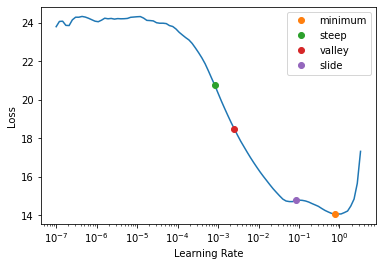

In [15]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [17]:
learn.fit_one_cycle(1, lr_max=3e-3, cbs=fit_cbs)

epoch,train_loss,valid_loss,perplexity,lm_accuracy,time
0,nan,99.039070,inf,0.037644,24:35


In [16]:
# learn.fit_one_cycle(1, lr_max=14e-1, cbs=fit_cbs)

epoch,train_loss,valid_loss,perplexity,lm_accuracy,time
0,nan,99.039070,inf,0.037644,25:57


In [ ]:
learn.show_results(learner=learn, trunc_at=250)

In [ ]:
learn.blurr_generate("ബ്‌ളൂർ പഠിക്കാൻ വളെരെ എളുപ്പമാണ് എന്തുകൊണ്ട് എന്നാൽ ", max_length=50, do_sample=True, top_k=25)

## Push to HF Hub

In [19]:
repo_id ="hugginglearners/malayalam-blurr-xlm-roberta-base"

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from huggingface_hub import push_to_hub_fastai

push_to_hub_fastai(learner=learn, repo_id=repo_id)

# Fine Tuning


[Causal-language-modeling](https://ohmeow.github.io/blurr/text-modeling-language-modeling.html#Causal-language-modeling)

In [21]:
from huggingface_hub import from_pretrained_fastai
learner = from_pretrained_fastai(repo_id)

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/768 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.15G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [22]:
learner.blurr_generate("ബ്‌ളൂർ പഠിക്കാൻ വളെരെ എളുപ്പമാണ് എന്തുകൊണ്ട് എന്നാൽ ", max_length=50, do_sample=True, top_k=25)

[{'generated_texts': 'ബ് ളൂർ പഠിക്കാൻ വളെരെ എളുപ്പമാണ് എന്തുകൊണ്ട് എന്നാൽ                                 '}]

## Blurr Fine Tuning

In [ ]:
train_df = train_df.iloc[1501:3000] #slice (train org.len = 408513, valid or.len=45391)
train_df.sample(frac=1) #Shuffle
valid_df = valid_df.iloc[1501:2000]
valid_df.sample(frac=1)

In [ ]:
learn = BlearnerForLM.from_data(train_df, repo_id, text_attr=0, dl_kwargs={"bs": 2}).to_fp16()

In [ ]:
learn.dls.show_batch(dataloaders=learn.dls, max_n=2, trunc_at=500)

In [ ]:
learn.fit_one_cycle(1, lr_max=3e-3, cbs=[BlearnerForLM.get_metrics_cb()])

In [ ]:
learn.show_results(learner=learn, trunc_at=250)

In [ ]:
learn.blurr_generate("ബ്‌ളൂർ പഠിക്കാൻ വളെരെ എളുപ്പമാണ് എന്തുകൊണ്ട് എന്നാൽ", max_length=50, do_sample=True, top_k=25)

# Evaluation

# Downstream Task (Malayalam - Tamil Translation)